**Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.**

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
warnings.filterwarnings('ignore')

## 2. Importing data

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## 3. Data Preparation

In [3]:
quarter = ['Q1','Q2','Q3','Q4']
n = cocacola['Quarter'][0]
n[0:2]

'Q1'

In [4]:
cocacola['quarter']=0

for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]

In [5]:
dummy = pd.DataFrame(pd.get_dummies(cocacola['quarter']))

In [6]:
coca = pd.concat((cocacola,dummy),axis=1)
t = np.arange(1,43)
coca['t'] = t
coca['t_square'] = coca['t']*coca['t']

**To calculate natural log of Sales**

In [7]:
log_Sales = np.log(coca['Sales'])   
coca['log_Sales'] = log_Sales

***Train-test split***

In [8]:
train = coca.head(30) 
test = coca.tail(10)

## 4. Data Visualization

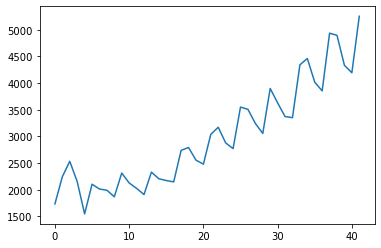

In [9]:
coca.Sales.plot()
plt.show()

## 5. Model Building, Model Training and Model Testing

#### **1. Linear Model**

In [10]:
linear = smf.ols('Sales~t',data=train).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test['t'])))

In [11]:
rmselin = np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

633.5699198697733

#### **2. Quadratic model**

In [12]:
quad = smf.ols('Sales~t+t_square',data=train).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))

In [13]:
rmsequad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

680.2527854192869

#### **3. Exponential model**

In [14]:
expo = smf.ols('log_Sales~t',data=train).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp

32    8.179811
33    8.201488
34    8.223165
35    8.244842
36    8.266519
37    8.288196
38    8.309873
39    8.331550
40    8.353227
41    8.374903
dtype: float64

In [15]:
rmseexpo = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

600.089369373966

#### **4. Additive Seasonality**

In [16]:
additive = smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd

32    2189.943999
33    2777.750122
34    2622.272569
35    2432.339711
36    2189.943999
37    2777.750122
38    2622.272569
39    2432.339711
40    2189.943999
41    2777.750122
dtype: float64

In [17]:
rmseadd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1898.3504804157517

##### 4. a) Additive Seasonality - With Linear trend

In [18]:
addlinear = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

32    3182.843302
33    3770.649425
34    3725.494016
35    3535.561158
36    3403.487591
37    3991.293714
38    3946.138306
39    3756.205448
40    3624.131881
41    4211.938004
dtype: float64

In [19]:
rmseaddlinear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

697.48329711454

##### 4. b) Additive Seasonality With Quadratic trend

In [20]:
addquad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))

In [21]:
rmseaddquad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

607.852072018353

#### **5. Multiplicative Seasonality**

In [22]:
mulsea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))

In [23]:
rmsemul = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1951.0349399697664

##### 5. a) Multiplicative Seasonality With Linear trend

In [24]:
mullin = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))

In [25]:
rmsemulin = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

449.4035489163238

##### 5. b) Multiplicative Seasonality With Quadratic trend

In [26]:
mul_quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))

In [27]:
rmse_mul_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

1695.6838657179153

### 5. Comparing different Root Mean Squared Error values (RMSE)

In [28]:
data = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0    1695.683866
 1    1898.350480
 2     697.483297
 3     607.852072
 4     600.089369
 5     633.569920
 6    1951.034940
 7     449.403549
 8     680.252785
 dtype: float64}

In [29]:
print("R-Mean Squared values : ", pd.DataFrame(data))

R-Mean Squared values :             Model       Values
0  rmse_mul_quad  1695.683866
1        rmseadd  1898.350480
2  rmseaddlinear   697.483297
3    rmseaddquad   607.852072
4       rmseexpo   600.089369
5        rmselin   633.569920
6        rmsemul  1951.034940
7      rmsemulin   449.403549
8       rmsequad   680.252785


## 6. Plot the Sales data to understand the trend

**Moving average for the time series to understand better about the trend character**

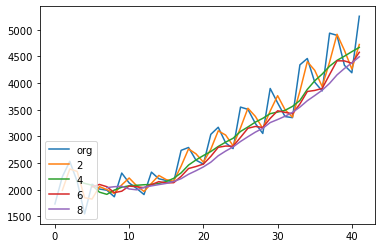

In [30]:
cocacola.Sales.plot(label="org")
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

## 7. Time series decomposition plot

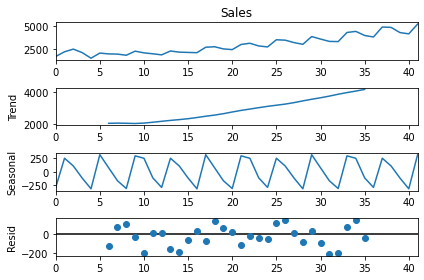

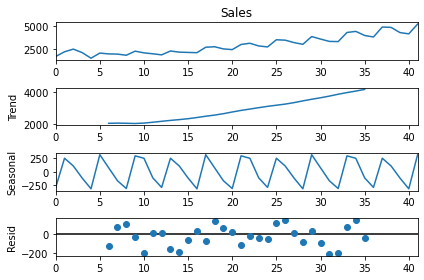

In [31]:
decompose_ts_add = seasonal_decompose(cocacola.Sales,period =12)
decompose_ts_add.plot()

## 8. ACF plots and PACF plots on Original data sets

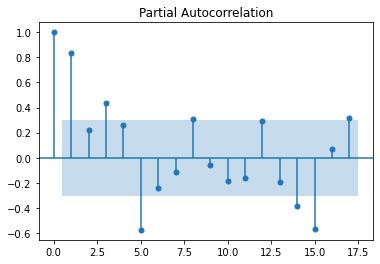

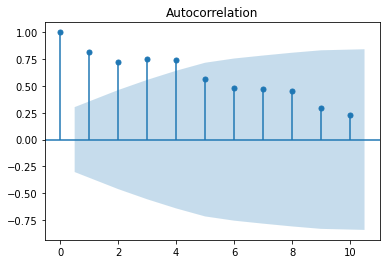

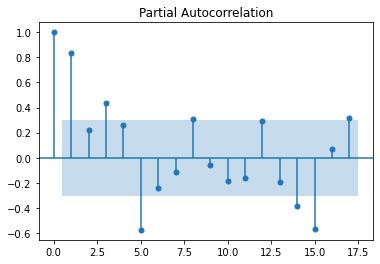

In [32]:
tsa_plots.plot_acf(cocacola.Sales,lags=10)
tsa_plots.plot_pacf(cocacola.Sales)

## 9. Creating a function to calculate the MAPE value for test data

In [33]:
 def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

## 10. Model selection / Model Building

### 1. Simple Exponential Method

In [34]:
ses_model = SimpleExpSmoothing(cocacola["Sales"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
print("Mean Absolute % error by Simple Exponential method : ",round(MAPE(pred_ses,test.Sales),3))

Mean Absolute % error by Simple Exponential method :  10.715


***Conclusion:-***
- The mean absolute percentage error (MAPE) is 9.701. 
- It measures the prediction accuracy of a forecasting method.

### 2. Holt-Winter's Method for Exponential Smoothing

In [35]:
hw_model = Holt(cocacola["Sales"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
print("Mean Absolute % error by Holt method : ",round(MAPE(pred_hw,test.Sales),3))

Mean Absolute % error by Holt method :  11.985


**2. a) With Additive Seasonality and Additive Trend**

In [36]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales)

6.988446577631033

**2. b) With Multiplicative Seasonality and Additive Trend**

In [37]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

4.010750275465611

## 11. Visualization of Forecasted values for Test data set using different methods

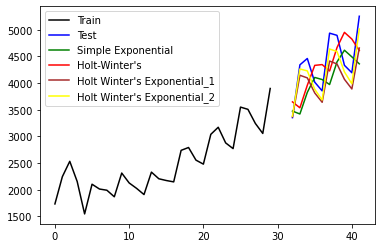

In [38]:
plt.plot(train.index, train["Sales"], label='Train',color="black")
plt.plot(test.index, test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='Simple Exponential',color="green")
plt.plot(pred_hw.index, pred_hw, label="Holt-Winter's",color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="Holt Winter's Exponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Holt Winter's Exponential_2",color="yellow")
plt.legend(loc='best')
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**